In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
## 한글 처리
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터셋 읽기

In [3]:
data = pd.read_csv('data/cs_data.csv')
data.shape

(150000, 12)

# EDA
- 데이터셋의 특성을 파악하기 위해 EDA를 진행한다.
- EDA를 통해 데이터셋의 분포, 결측치, 이상치 등을 확인한다.
- 데이터셋의 특성을 파악한 후, 모델링을 진행하기 위한 전처리 방향을 설정한다.
- EDA는 전체 데이터셋을 대상으로 진행합니다.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
# info() 확인: 1번 컬럼(index가 저장된 컬럼) 삭제
data = data.drop(data.columns[0], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

- 컬럼이름 이해하기 쉽게 변경한다.
    - 컬럼명이 약어로 되어있거나, 이해하기 어려운 경우 컬럼명을 변경한다.
    - 대소문자가 섞여 있는 경우 하나로 통일한다.

In [7]:
# 컬럼명을 모두 소문자로 변경
data.columns = data.columns.str.lower() # str accessor 사용해서 일괄처리
data.columns

Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime30-59dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime60-89dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

## Target 분포 확인

In [8]:
print("--개수--------------")
print(data['seriousdlqin2yrs'].value_counts())
print("--비율--------------")
print(data['seriousdlqin2yrs'].value_counts(normalize=True))

--개수--------------
seriousdlqin2yrs
0    139974
1     10026
Name: count, dtype: int64
--비율--------------
seriousdlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64


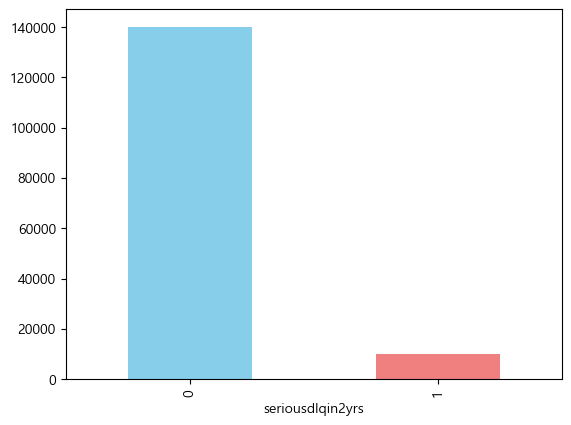

In [9]:
data['seriousdlqin2yrs'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral']);

## 결측치

In [10]:
## 확인
data.isna().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime30-59dayspastduenotworse        0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60-89dayspastduenotworse        0
numberofdependents                       3924
dtype: int64

In [11]:
data.isna().mean()

seriousdlqin2yrs                        0.000000
revolvingutilizationofunsecuredlines    0.000000
age                                     0.000000
numberoftime30-59dayspastduenotworse    0.000000
debtratio                               0.000000
monthlyincome                           0.198207
numberofopencreditlinesandloans         0.000000
numberoftimes90dayslate                 0.000000
numberrealestateloansorlines            0.000000
numberoftime60-89dayspastduenotworse    0.000000
numberofdependents                      0.026160
dtype: float64

### 결측치 처리 방법

- monthlyincome: 중앙값 대체
- numberofdependents: 최빈값(0)으로 대체

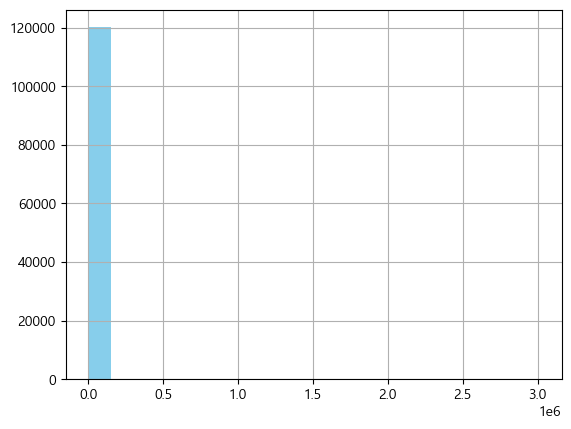

In [12]:
## monthlyincome 확인
### 값들이 앞에 몰려있다. (왼쪽으로 치우쳐져 있다.) 중앙값으로 대체
data['monthlyincome'].hist(bins=20, color='skyblue');

In [13]:
## numberofdependents 확인
### 대부분이 0이다. 최빈값 0으로 대체
data['numberofdependents'].value_counts()

numberofdependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

## 이상치

### 이상치 확인

In [14]:
# IQR 기반으로 Outlier 값 조회 메소드

def is_outlier(data, whis=1.5):
    """
    IQR 기반으로 Outlier 값 조회 메소드
    parameter
        data: outlier를 찾을 데이터
        whis: IQR에 몇배를 극단치 계산에 사용할 지 비율. rate를 크게하면 outlier범위를 넓게 잡는다. 작게 주면 범위를 좁게 잡는다.
    return
        bool type ndarray: 각 원소별 outlier 여부 (True: Outlier(이상치), False: 정상범위값)
    """
    q1 = np.quantile(data, q=0.25)
    q3 = np.quantile(data, q=0.75)
    IQR = q3 - q1
    return (data < q1 - IQR * whis) | (data > q3 + IQR * whis)


def get_normal_range(data, whis=1.5):
    """
    IQR 기반으로 정상범위 조회 메소드
    parameter
        data: 조회할 대상 데이터
        whis: IQR에 몇배를 극단치 계산에 사용할 지 비율. rate를 크게하면 outlier범위를 넓게 잡는다. 작게 주면 범위를 좁게 잡는다.
    return
        tuple: (lower_bound, upper_bound) - 정상범위의 하한값과 상한값
    """
    q1 = np.nanquantile(data, q=0.25)
    q3 = np.nanquantile(data, q=0.75)
    IQR = q3 - q1
    lower_bound = q1 - IQR * whis
    upper_bound = q3 + IQR * whis
    return lower_bound, upper_bound

In [15]:
## 시각화 (number 타입만)
### 나눠서 그리기 위해 컬럼이름들 조회
c = data.select_dtypes(include=[np.number]).drop(columns=data.columns[0]).columns
len(c)

10

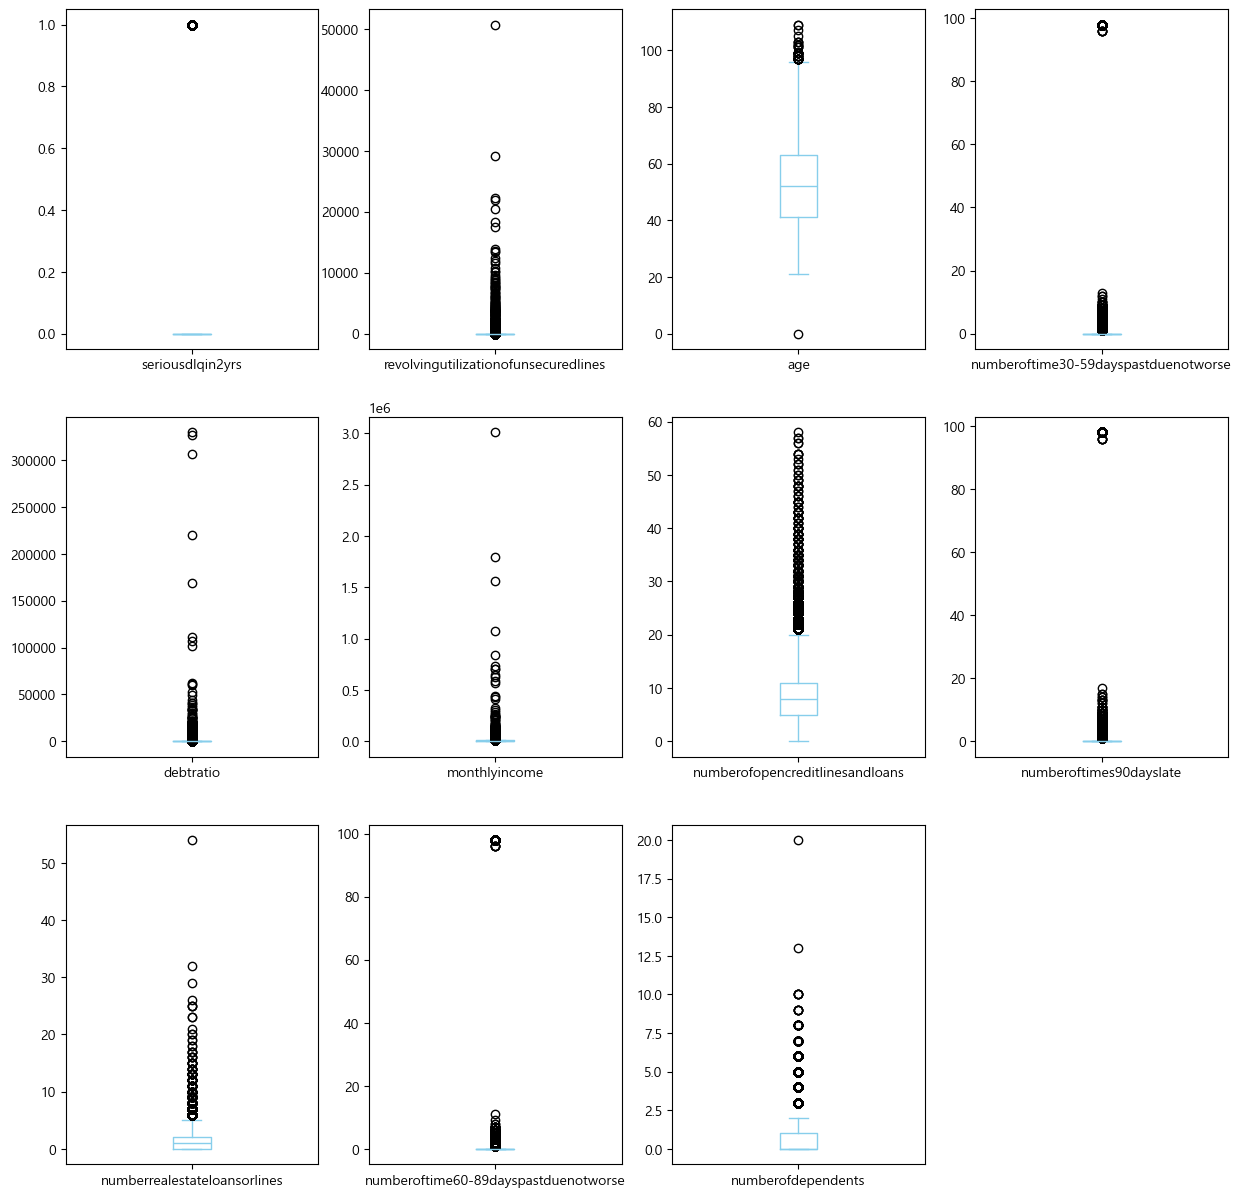

In [16]:
# subplots=True, layout=(3, 4): 3행 4열로 나눠서
data.select_dtypes(include=[np.number]).plot(kind='box', subplots=True, layout=(3, 4), figsize=(15, 15), color='skyblue');

## 각 컬럼별 이상치 처리

### revolvingutilizationofunsecuredlines
- 전체 운용가능한 돈 대비 현재 운용가능한 돈의 비율 (남은신용한도+통장잔고/ 총신용한도+통장잔고)
- 1초과하는 값들을 1로 변경한다

In [17]:
data['revolvingutilizationofunsecuredlines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: revolvingutilizationofunsecuredlines, dtype: float64

In [18]:
# 1.0 이상인 값들의 개수
(data['revolvingutilizationofunsecuredlines'] > 1.0).sum()

np.int64(3321)

### age
- 대출자 나이
- 최소값이 0, 최대값 109
- 21 이하인 값들은 중위수로 변환 

In [19]:
data['age'].value_counts().sort_index()

age
0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: count, Length: 86, dtype: int64

### numberoftime30-59dayspastduenotworse, numberoftime60-89dayspastduenotworse, numberoftimes90dayslate

- 30 ~ 59, 60 ~ 89, 90이상 연체한 횟수
- 96, 98 두개의 값을 가지는 행이 있다.
    - 96은 5개 98은 264개로 세 컬럼의 같은 행이 같이 두 값을 가지고 있다. 
    - 이런 경우 특정 의미를 표현하는 코드 값일 수 있다. 그래서 제거하지 않고 유지한다.

In [20]:
data[['numberoftime30-59dayspastduenotworse', 'numberoftime60-89dayspastduenotworse', 'numberoftimes90dayslate']].describe()
# MAX 가 98. 너무 큰값이다.

,numberoftime30-59dayspastduenotworse,numberoftime60-89dayspastduenotworse,numberoftimes90dayslate
count,150000.000000,150000.000000,150000.000000
mean,0.421033,0.240387,0.265973
std,4.192781,4.155179,4.169304
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [21]:
data['numberoftime30-59dayspastduenotworse'].value_counts().sort_index(ascending=False)

numberoftime30-59dayspastduenotworse
98       264
96         5
13         1
12         2
11         1
10         4
9         12
8         25
7         54
6        140
5        342
4        747
3       1754
2       4598
1      16033
0     126018
Name: count, dtype: int64

In [22]:
data['numberoftime60-89dayspastduenotworse'].value_counts().sort_index(ascending=False)

numberoftime60-89dayspastduenotworse
98       264
96         5
11         1
9          1
8          2
7          9
6         16
5         34
4        105
3        318
2       1118
1       5731
0     142396
Name: count, dtype: int64

In [23]:
data['numberoftimes90dayslate'].value_counts().sort_index(ascending=False)

numberoftimes90dayslate
98       264
96         5
17         1
15         2
14         2
13         4
12         2
11         5
10         8
9         19
8         21
7         38
6         80
5        131
4        291
3        667
2       1555
1       5243
0     141662
Name: count, dtype: int64

In [24]:
data.loc[(data['numberoftime30-59dayspastduenotworse'] > 95) & 
        (data['numberoftime60-89dayspastduenotworse'] > 95) & 
        (data['numberoftimes90dayslate'] > 95)].shape

# 위 세개 컬럼에서 96, 98 을 가지는 행이 동일하다.
# 96, 98 은 은행에서 사용하는 코드값으로 추측할 수 있다. 

(269, 11)

In [25]:
# 96인 행들 조회. 모두 동일한 행임.
data.loc[(data['numberoftime30-59dayspastduenotworse'] == 96) & 
        (data['numberoftime60-89dayspastduenotworse'] == 96) & 
        (data['numberoftimes90dayslate'] == 96), ['numberoftime30-59dayspastduenotworse','numberoftime60-89dayspastduenotworse','numberoftimes90dayslate']]

,numberoftime30-59dayspastduenotworse,numberoftime60-89dayspastduenotworse,numberoftimes90dayslate
41944,96,96,96
69478,96,96,96
84167,96,96,96
94106,96,96,96
120049,96,96,96


### debtratio 
- 소득 대비 부채비율(대출상환금+생활비/소득)
- 정상범위를 넓힌 뒤 (whis=5000)  최대값으로 대체한다. (2.5% 밖에 있는 데이터들.)
  - 1.5일 경우 20% 정도가 이상치임. 

In [26]:
data['debtratio'].describe()
# max: 329664. 소득대비 부채비율이 33만배라는 의미. 

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: debtratio, dtype: float64

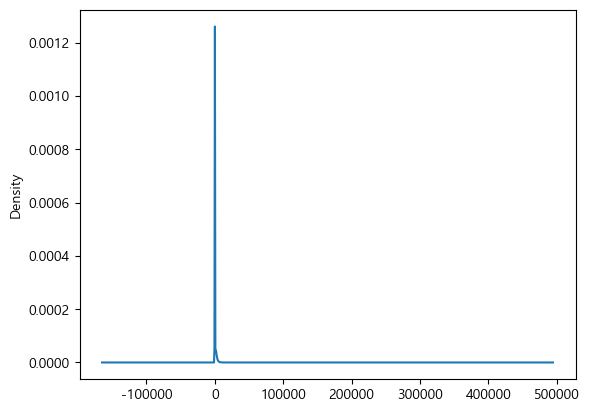

In [27]:
data['debtratio'].plot(kind='kde');

In [28]:
data['debtratio'].quantile(q=0.975)
# 상위 2.5%가 소득에 비해 부채가 3489 배 정도로 나온다.

np.float64(3489.024999999994)

In [29]:
get_normal_range(data['debtratio'], whis=1.5)

(np.float64(-0.8646960792499998), np.float64(1.9080236847499998))

In [30]:
# whis=5000일 때 이상치 비율 2.5%
print("비율:",is_outlier(data['debtratio'], whis=5000).mean())  # 0.025 (2.5 비율)
print("범위:", get_normal_range(data['debtratio'], whis=5000))

비율: 0.025413333333333333
범위: (np.float64(-3465.7246311677495), np.float64(3466.7679587732496))


### monthlyincome
- 월간 소득
- 정상범위의 최대 값으로 대체한다.
  - 정상 범위를 넘어간 값들의 개수가 많지 않으므로 같은 값으로 변경해서 하나의 값으로 만든다.

In [31]:
np.round(data['monthlyincome'].describe(), 2)

count     120269.00
mean        6670.22
std        14384.67
min            0.00
25%         3400.00
50%         5400.00
75%         8249.00
max      3008750.00
Name: monthlyincome, dtype: float64

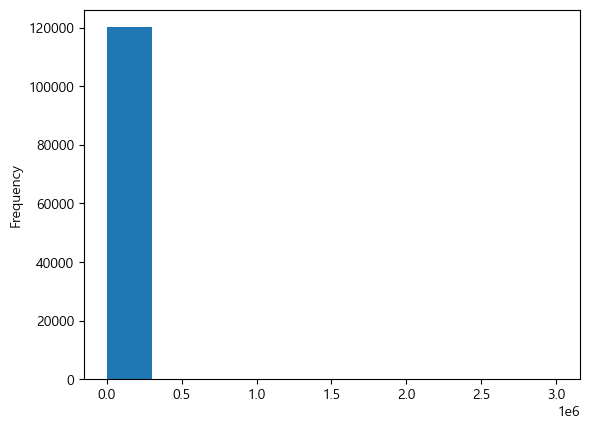

In [32]:
data['monthlyincome'].plot(kind='hist', bins=10);

In [33]:
low, high = get_normal_range(data['monthlyincome'], whis=1.5)
print(low, high)

-3873.5 15522.5


In [34]:
# 정상범위를 벋어난 값들의 개수
data.query('monthlyincome > @high').shape

(4879, 11)

# 전처리 정리
- 결측치 처리
  - monthlyincome: 중앙값 대체
  - numberofdependents: 최빈값(0)으로 대체

- 이상치 처리
  - revolvingutilizationofunsecuredlines
    - 1초과하는 값들을 1로 변경한다
  - age
    - 21 이하인 값들은 중위수로 변환 
  - debtratio 
    - 정상범위를 넓힌 뒤 (whis=5000)  최대값으로 대체한다.
  - monthlyincome
    - 정상범위의 최대 값으로 대체한다.
  

# DataLoad 함수

In [36]:
%%writefile dataloader.py

import pandas as pd

def load_dataset():
    # load dataset
    data = pd.read_csv('data/cs_data.csv')
    # 컬럼명 소문자로 변경
    data.columns = data.columns.str.lower()
    # taget 컬럼을 y로, 나머지를 X로
    data = data.drop(data.columns[0], axis=1)
    X = data.drop(columns='seriousdlqin2yrs')
    y = data['seriousdlqin2yrs']
    
    return X, y

Overwriting dataloader.py


# 전처리 파이프라인 생성

> ## 사용자 정의 전처리기 생성
> - sklearn.base 모듈의 BaseEstimator, TransformerMixin 를 상속받는다.
> - fit(self, X, y=None), transform(self, X, y=None) 메서드를 구현한다.
>    - fit() 은 입력받은 데이터 X 와 y 를 사용해 변환할 때 사용할 값을 찾아 self 에 attribute로 저장한다.
>    - transform() 은 fit() 에서 찾은 값으로 변환한다.

In [37]:
%%writefile preprocessing.py

import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# revolvingutilizationofunsecuredlines 에 적용할 Transformer 클래스
## 1초과하는 값들을 1로 변경한다

class CapValuesTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_capped = np.where(X > 1, 1, X)
        return X_capped
    
# Age 전처리에 적용할 transformer 클래스
## 21 이하인 값들은 중위수로 변환

class AgeTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        """
        X의 중위값을 계산해서 저장
        """
        self.median_value = np.median(X)
        return self
    
    def transform(self, X, y=None):
        X_transformed = np.where(X <= 21, self.median_value, X)
        return X_transformed
    
# debtratio, monthlyincome 전처리에 적용할 transformer 클래스
## - 정상범위 최대값, 최소값으로 대체한다.
## - debtratio: 2000, monthlyincome: 1.5 배의 IQR로 계산한 최대값, 최소값으로 대체한다.

class OutlierTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, whis=1.5):
        self.whis = whis
    
    def fit(self, X, y=None):
        q1 = np.nanquantile(X, q=0.25)
        q3 = np.nanquantile(X, q=0.75)
        IQR = q3 - q1
        self.lower_bound = q1 - IQR * self.whis
        self.upper_bound = q3 + IQR * self.whis
        return self
    
    def transform(self, X, y=None):
        X_transformed = np.where(X < self.lower_bound, self.lower_bound, X)
        X_transformed = np.where(X_transformed > self.upper_bound, self.upper_bound, X_transformed)
        return X_transformed


Overwriting preprocessing.py


## 파이프라인구성

In [2]:
from preprocessing import CapValuesTransformer, AgeTransformer, OutlierTransformer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline을 이용한 전처리

nullvalue_transformer = ColumnTransformer(
    [
        ('income_imputer', SimpleImputer(strategy='median'), [4]), # monthlyincome
        ('dependents_imputer', SimpleImputer(strategy='most_frequent'), [-1]) #numberofdependents
    ], remainder='passthrough' # 나머지 컬럼은 그대로 전달
)

revolving_outlier = CapValuesTransformer()
age_outlier = AgeTransformer()
debtratio_outlier = OutlierTransformer(whis=5000)
monthlyincome_outlier = OutlierTransformer()

outlier_transformer = ColumnTransformer(
    [
        ('revolving_outlier', revolving_outlier, [0]), # revolvingutilizationofunsecuredlines
        ('age_outlier', age_outlier, [1]), # age
        ('debtratio_outlier', debtratio_outlier, [3]),  # debtratio
        ('monthlyincome_outlier', monthlyincome_outlier, [4]) # monthlyincome
    ],remainder='passthrough' # 나머지 컬럼은 그대로 전달
)

preprocessor_pipeline = Pipeline([
    ("imputer", nullvalue_transformer),
    ("outlier", outlier_transformer),
    ("scaler", StandardScaler())
], verbose=True)

In [3]:
preprocessor_pipeline

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('income_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [4]),
                                                 ('dependents_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [-1])])),
                ('outlier',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('revolving_outlier',
                                                  CapValuesTransformer(), [0]),
                                                 ('age_outlier',
                                                  AgeTransformer(), [1]),
                                                 ('debtratio_outlier',
                                                  OutlierTransformer(whis=5000),
                                                  [3]),
                                                 ('monthlyincome_outlier',
                                                  OutlierTransformer(),
                                                  [4])])),
                ('scaler', StandardScaler())],
         verbose=True)

# 데이터셋 준비

In [5]:
from dataloader import load_dataset
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

# X, y 분리
X, y = load_dataset()

# Train/Test/Validation set 나누기.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

print(X_train.shape, X_test.shape, X_valid.shape, y_train.shape, y_test.shape, y_valid.shape)

(90000, 10) (30000, 10) (30000, 10) (90000,) (30000,) (30000,)


In [6]:
# 비율 확인
print(np.unique(y, return_counts=True)[1]/y.size)
print(np.unique(y_train, return_counts=True)[1]/y_train.size)
print(np.unique(y_test, return_counts=True)[1]/y_test.size)
print(np.unique(y_valid, return_counts=True)[1]/y_valid.size)

[0.93316 0.06684]
[0.93315556 0.06684444]
[0.93316667 0.06683333]
[0.93316667 0.06683333]


In [7]:
X_train_preprocessed = preprocessor_pipeline.fit_transform(X_train.values)
X_test_preprocessed = preprocessor_pipeline.transform(X_test.values)
X_valid_preprocessed = preprocessor_pipeline.transform(X_valid.values)

[Pipeline] ........... (step 1 of 3) Processing imputer, total=   0.0s
[Pipeline] ........... (step 2 of 3) Processing outlier, total=   0.0s
[Pipeline] ............ (step 3 of 3) Processing scaler, total=   0.0s


## 전처리 파이프라인 저장

In [41]:
import joblib
import os

os.makedirs('models', exist_ok=True)
joblib.dump(
    preprocessor_pipeline,     # 저장할 모델/전처리기
    "models/preprocessor.pkl"  # 저장경로. pickle로 저장된다.
)

['models/preprocessor.pkl']

# Baseline 모델링

## Baseline 모델 생성

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = [
    ("LR", LogisticRegression(random_state=0, max_iter=3000)),
    ("GBM", GradientBoostingClassifier(random_state=0)),
    ("RF", RandomForestClassifier(random_state=0)),
    ("KNN", KNeighborsClassifier()),
    ("XGB", XGBClassifier(random_state=0))
]

## Baseline 모델 학습

In [18]:
baseline_result_train_dict = {}
baseline_result_valid_dict = {}


for name, model in models:
    print(f"Training {name}...")
    model.fit(X_train_preprocessed, y_train)
    
    pred_valid = model.predict(X_valid_preprocessed)
    pred_proba_valid = model.predict_proba(X_valid_preprocessed)[:, 1]

    accuracy_valid = accuracy_score(y_valid, pred_valid)
    precision_valid = precision_score(y_valid, pred_valid)
    recall_valid = recall_score(y_valid, pred_valid)
    f1_valid = f1_score(y_valid, pred_valid)
    auc_valid = roc_auc_score(y_valid, pred_proba_valid)
    
    baseline_result_valid_dict[name] = [accuracy_valid, precision_valid, recall_valid, f1_valid, auc_valid]

Training LR...
Training GBM...
Training RF...
Training KNN...
Training XGB...


## Baseline 모델 평가결과 확인

In [44]:
pd.DataFrame(baseline_result_valid_dict, index=['accuracy', 'precision', 'recall', 'f1', 'roc-auc'])

,LR,GBM,RF,KNN,XGB
accuracy,0.933633,0.939000,0.936500,0.933100,0.937567
precision,0.574468,0.654321,0.571839,0.498344,0.605096
recall,0.026933,0.185037,0.198504,0.150125,0.189526
f1,0.051453,0.288491,0.294706,0.230740,0.288644
roc-auc,0.649215,0.853610,0.818462,0.706919,0.846394


# 모델 튜닝

- ROC-AUC Score 기준으로 GBM, XGB 성능이 높으므로 이 둘을 기준으로 하이퍼파라미터 튜닝을 진행한다.

In [49]:
from sklearn.model_selection import RandomizedSearchCV

param_gbm = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'n_estimators': [1000, 2000, 3000, 4000, 5000],
    'max_depth': range(1, 6),
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

param_xgb = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'n_estimators': [1000, 2000, 3000, 4000, 5000],
    'max_depth': range(1, 6),
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Initialize RandomizedSearchCV for each model
random_search_gbm = RandomizedSearchCV(GradientBoostingClassifier(random_state=0), param_gbm, cv=4, scoring='roc_auc', n_jobs=-1, n_iter=60, random_state=0)
random_search_xgb = RandomizedSearchCV(XGBClassifier(random_state=0), param_xgb, cv=4, scoring='roc_auc', n_jobs=-1, n_iter=60, random_state=0)

print("GradientBoostingClassifier 튜닝...")
random_search_gbm.fit(X_train_preprocessed, y_train)

print("XGBClassifier 튜닝...")
random_search_xgb.fit(X_train_preprocessed, y_train)

GradientBoostingClassifier 튜닝...
XGBClassifier 튜닝...


## 튜닝 결과 확인

In [51]:
## Best parameter 확인
print("GradientBoostingClassifier Best parameters:", random_search_gbm.best_params_)
print("XGBClassifier Best parameters:", random_search_xgb.best_params_)

GradientBoostingClassifier Best parameters: {'subsample': 0.7, 'n_estimators': 3000, 'max_depth': 3, 'learning_rate': 0.01}
XGBClassifier Best parameters: {'subsample': 0.7, 'n_estimators': 3000, 'max_depth': 2, 'learning_rate': 0.01}


In [50]:
print("GradientBoostingClassifier Best score:", random_search_gbm.best_score_)
print("XGBClassifier Best score:", random_search_xgb.best_score_)

GradientBoostingClassifier Best score: 0.8477868869019631
XGBClassifier Best score: 0.8490540434753531


# 모델 저장, 최종 테스트

In [52]:
best_gbm = random_search_gbm.best_estimator_
best_xgb = random_search_xgb.best_estimator_

In [54]:
# Evaluate the best models on the test set
best_models = [
    ("GradientBoostingClassifier", best_gbm),
    ("XGBClassifier", best_xgb)
]

test_results = {}

for name, model in best_models:
    print(f"평가 {name}...")
    pred_test = model.predict(X_test_preprocessed)
    pred_proba_test = model.predict_proba(X_test_preprocessed)[:, 1]

    accuracy_test = accuracy_score(y_test, pred_test)
    precision_test = precision_score(y_test, pred_test)
    recall_test = recall_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)
    auc_test = roc_auc_score(y_test, pred_proba_test)
    
    test_results[name] = [accuracy_test, precision_test, recall_test, f1_test, auc_test]

평가 GradientBoostingClassifier...
평가 XGBClassifier...


In [ ]:
pd.DataFrame(test_results, index=['accuracy', 'precision', 'recall', 'f1', 'roc-auc'])

,GradientBoostingClassifier,XGBClassifier
accuracy,0.935867,0.935733
precision,0.570928,0.565144
recall,0.162594,0.166584
f1,0.253106,0.257319
auc,0.850191,0.850636


In [ ]:
##### 모델 저장
joblib.dump(best_gbm, 'models/best_gbm.pkl')
joblib.dump(best_xgb, 'models/best_xgb.pkl')

print("Models saved successfully.")

Models saved successfully.
